<b>Introdução à PNL: Word Embeddings, GloVe e classificação de texto</b></br>
Neste caderno vamos explicar os conceitos e o uso de word embeddings na PNL, usando o Glove como exemplo. Em seguida, tentaremos aplicar os embeddings de palavras do Glove pré-treinados para resolver um problema de classificação de texto usando essa técnica.


<b>Incorporações de palavras</b></br>
O que é incorporação de palavras? Embeddings de palavras são um tipo de representação de palavras que permite que palavras com significado semelhante tenham uma representação semelhante. Eles são uma representação distribuída para texto que talvez seja um dos principais avanços para o desempenho impressionante dos métodos de aprendizado profundo em problemas desafiadores de processamento de linguagem natural.</br></br>
Word embeddings são, na verdade, uma classe de técnicas em que palavras individuais são representadas como vetores de valor real em um espaço vetorial predefinido. Cada palavra é mapeada para um vetor e os valores vetoriais são aprendidos de uma maneira que se assemelha a uma rede neural e, portanto, a técnica é frequentemente agrupada no campo de aprendizado profundo. A representação distribuída é aprendida com base no uso de palavras. Isso permite que palavras usadas de maneira semelhante resultem em representações semelhantes, capturando naturalmente seu significado.</br></br>
<b>Os embeddings de redes neurais têm três propósitos principais:</b></br>
Encontrar vizinhos mais próximos no espaço de incorporação. Eles podem ser usados ​​para fazer recomendações com base nos interesses do usuário ou nas categorias de cluster.</br>
Como entrada para um modelo de aprendizado de máquina para uma tarefa supervisionada.</br>
Para visualização de conceitos e relações entre categorias.</br></br>
<b>Como podemos obter as incorporações de palavras?</b></br>
Uma camada de incorporação é uma incorporação de palavras que é aprendida em um modelo de rede neural em uma tarefa específica de processamento de linguagem natural. Os documentos ou corpus da tarefa são limpos e preparados e o tamanho do espaço vetorial é especificado como parte do modelo, como 50, 100 ou 300 dimensões. Os vetores são inicializados com pequenos números aleatórios. A camada de incorporação é usada no front-end de uma rede neural e é ajustada de forma supervisionada usando o algoritmo Backpropagation.</br></br>
<b>É uma camada flexível que pode ser usada de várias maneiras, como:</b></br>
Ele pode ser usado sozinho para aprender uma incorporação de palavras que pode ser salva e usada em outro modelo posteriormente.</br>
Ele pode ser usado como parte de um modelo de aprendizado profundo em que a incorporação é aprendida junto com o próprio modelo.</br>
Ele pode ser usado para carregar um modelo de incorporação de palavras pré-treinado, um tipo de aprendizado de transferência.</br>
Essa abordagem requer muitos dados de treinamento e pode ser muito lenta, mas aprenderá uma incorporação direcionada aos dados de texto específicos e à tarefa de PNL em que estamos interessados.</br></br>
<b>Word2Vec</b></br>
Word2Vec é um método estatístico para aprender eficientemente uma incorporação de palavras autônoma de um corpus de texto. Foi desenvolvido por Tomas Mikolov, et al. no Google em 2013 como uma resposta para tornar o treinamento baseado em rede neural da incorporação mais eficiente e, desde então, tornou-se o padrão de fato para o desenvolvimento de incorporação de palavras pré-treinadas.</br></br>
<b>Ele aprende a palavra incorporação de duas maneiras:</b></br>
Usando o contexto para prever uma palavra-alvo, um método conhecido como saco contínuo de palavras ou CBOW</br>
ou usando uma palavra para prever um contexto de destino, que é chamado de skip-gram, por exemplo, gostaríamos de prever palavras de contexto c com uma palavra de destino na entrada. O último método geralmente produz resultados mais precisos em grandes conjuntos de dados.</br></br>
<img src='cbow.png'></br></br>
Um conjunto bem treinado de vetores de palavras colocará palavras semelhantes próximas umas das outras nesse espaço. As palavras carvalho, olmo e bétula podem se agrupar em um canto, enquanto guerra, conflito e conflito se amontoam em outro.</br></br>
<b>GloVe</b></br>
O algoritmo Global Vectors for Word Representation, ou GloVe, é uma extensão do método word2vec para o aprendizado eficiente de vetores de palavras, desenvolvido por Pennington, et al. em Stanford. GloVe é um algoritmo de aprendizado não supervisionado para obter representações vetoriais para palavras. O treinamento é realizado em estatísticas globais agregadas de coocorrência palavra-palavra de um corpus, e as representações resultantes mostram subestruturas lineares interessantes do espaço vetorial de palavras.</br></br>
GloVe é uma abordagem para casar tanto as estatísticas globais de técnicas de fatoração de matrizes como LSA (Análise Semântica Latente) com o aprendizado baseado em contexto local em word2vec. Em vez de usar uma janela para definir o contexto local, o GloVe constrói um contexto de palavra explícito ou uma matriz de coocorrência de palavras usando estatísticas em todo o corpus de texto.</br></br>
Uma explicação extensa no próximo link: Jeffrey Pennington, Richard Socher e Christopher D. Manning. 2014. GloVe: Vetores Globais para Representação de Palavras. https://nlp.stanford.edu/pubs/glove.pdf

<b>Bibliotecas</b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import pickle
from joblib import load
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc

from gensim.models import KeyedVectors

<b>Carregando uma incorporação de palavras pré-treinada: GloVe</b></br>
Arquivos com os vetores pré-treinados Glove podem ser encontrados em diversos sites como o Kaggle ou no link anterior da Stanford University. Usaremos o arquivo glove.6B.300d.txt contendo os vetores de luva treinados no conjunto de dados Wikipedia e GigaWord.
Primeiro, convertemos o arquivo GloVe contendo a palavra embeddings para o formato word2vec para conveniência de uso. Podemos fazer isso usando a biblioteca gensim, uma função chamada glove2word2vec.

In [2]:
glove_w2vec = KeyedVectors.load_word2vec_format('glove.6B.300d.txt', binary=False)
len(glove_w2vec.vectors)

400000

Portanto, nosso vocabulário contém 400 mil palavras representadas por um vetor de recursos de 300d.

Observação:</br>
Baixe o seu arquivo 'glove.6B.300d.txt' no site https://nlp.stanford.edu/projects/glove/

<b>Carregando o conjunto de dados</b></br>

In [3]:
df = load('df.z')
df

,text,sentiment,confusion,urgency,course
0,interesting often things others without really...,1,0,0,1
1,algebra math game saying create games incorpor...,1,1,0,1
2,like idea kids principal says smart mean easy ...,1,0,0,1
3,responses seems students really liked power fe...,1,0,0,1
4,boys loved math freedom anything great math nu...,1,0,0,1
...,...,...,...,...,...
29404,value tells probability observing sample stati...,1,0,0,8
29405,given null hypothesis considered true,1,0,0,8
29406,hello josh hypothesis formulation correct brea...,1,1,1,8
29407,josh looking table question first number secon...,0,1,1,8


In [4]:
x = df.text
y = df.urgency
xtrain, xtest, ytrain, ytest = train_test_split(x, y, stratify=y, random_state=42, test_size=0.1, shuffle=True)

<b>Aplicando a incorporação de palavras a uma tarefa de classificação de texto</b></br>
Agora, temos nossa representação de palavras, um vetor para cada palavra em nosso vocabulário. Mas precisamos lidar com frases completas, então precisamos criar uma incorporação de frases, basicamente precisamos de um vetor que represente a frase inteira e todos os recursos do vetor serão baseados na incorporação de palavras. Existem muitas possibilidades e não vamos abordar este tópico, então aplicamos um método muito simples: o valor i na inserção da sentença será a média dos valores i na inserção da palavra de todas as palavras da sentença.</br></br>
Criaremos uma classe que conterá nosso vocabulário e o GloVe e, em seguida, transformará cada revisão (uma frase em nosso exemplo) em uma representação vetorial conforme descrevemos anteriormente.

In [5]:
class Word2VecVectorizer:
  def __init__(self, model):
    print("Carregando vetores de palavras...")
    self.word_vectors = model
    print("Carregamento finalizado.")

  def fit(self, data):
    pass

  def transform(self, data):
    # dimensionalidade dos vetores
    v = self.word_vectors.get_vector('king')
    self.D = v.shape[0]

    X = np.zeros((len(data), self.D))
    n = 0
    emptycount = 0
    for sentence in data:
      tokens = sentence.split()
      vecs = []
      m = 0
      for word in tokens:
        try:
          # lança KeyError se a palavra não for encontrada
          vec = self.word_vectors.get_vector(word)
          vecs.append(vec)
          m += 1
        except KeyError:
          pass
      if len(vecs) > 0:
        vecs = np.array(vecs)
        X[n] = vecs.mean(axis=0)
      else:
        emptycount += 1
      n += 1
    print("Número de amostras sem palavras encontradas: %s / %s" %
          (emptycount, len(data)))
    return X

  def fit_transform(self, data):
    self.fit(data)
    return self.transform(data)


Em seguida, criamos um objeto Vectorizer que nos ajudará a transformar nossas revisões em vetores, uma representação numérica. Então podemos usar esses vetores para alimentar nosso classificador.

In [6]:
# definir um vetorizador de palavras 
vectorizer = Word2VecVectorizer(glove_w2vec)
# obter os embeddings de frases para o conjunto de treino e teste
xtrain = vectorizer.fit_transform(xtrain)
xtest = vectorizer.transform(xtest)

Carregando vetores de palavras...
Carregamento finalizado.
Número de amostras sem palavras encontradas: 18 / 26468
Número de amostras sem palavras encontradas: 0 / 2941


<b>Treinar um classificador nas incorporações de frases</b></br>
Como a classificação de texto é apenas um tipo de problema de classificação, podemos aplicar alguns dos classificadores conhecidos para prever o rótulo de um texto. As próximas células constroem modelos diferentes para resolver nossa tarefa de classificação.</br>
Mas primeiro criamos algumas funções auxiliares para plotar os resultados:

In [7]:
# Cria a matriz de confusão
def plot_confussion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)    
    df_cm = pd.DataFrame(cm, range(cm.shape[0]), range(cm.shape[1]))    
    sn.set(font_scale=1.4)  
    sn.heatmap(df_cm, annot=True, fmt='.0f', annot_kws={"size": 10}) 
    plt.show()

# Curva ROC
# Calcula os pontos na curva ROC
def plot_roc_curve(y_test, y_pred):    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

<b>Um classificador de floresta aleatória</b></br>
Primeiro, tentamos com um modelo simples, um Random Forest. Pode ser considerado como uma referência de referência para qualquer problema de classificação binária.</br>
Este caderno é sobre incorporação de palavras, então não estamos cobrindo ou interessados ​​em construir o melhor classificador. Queremos nos mostrar como usar os embeddings de uma maneira muito simples.

train score: 0.9995466223364062
test score: 0.8075484529071745
              precision    recall  f1-score   support

           0    0.81091   0.98304   0.88871      2299
           1    0.74675   0.17913   0.28894       642

    accuracy                        0.80755      2941
   macro avg    0.77883   0.58108   0.58883      2941
weighted avg    0.79690   0.80755   0.75779      2941



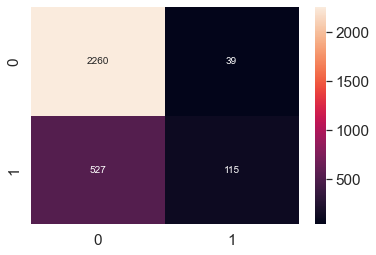

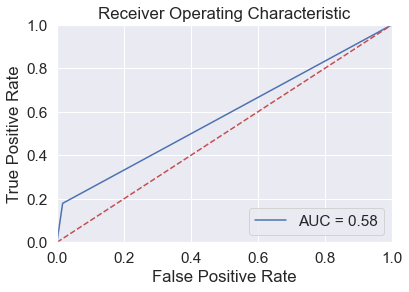

In [8]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=200)
clf.fit(xtrain, ytrain)

print("train score:", clf.score(xtrain, ytrain))
print("test score:", clf.score(xtest, ytest))

# Prevendo os resultados do conjunto de testes
y_pred = clf.predict(xtest)

print(metrics.classification_report(ytest, y_pred,  digits=5))
plot_confussion_matrix(ytest, y_pred)
plot_roc_curve(ytest, y_pred)


<b>Classificador de máquina de vetor de suporte</b></br>
O que são máquinas de vetor de suporte?</br>
O objetivo do algoritmo da máquina de vetores de suporte é encontrar um hiperplano em um espaço N-dimensional (N — o número de recursos) que classifique distintamente os pontos de dados.</br></br>
Em um problema de classificação binária, para separar as duas classes de pontos de dados, existem muitos hiperplanos possíveis que podem ser escolhidos. Nosso objetivo é encontrar um plano que tenha a margem máxima, ou seja, a distância máxima entre os pontos de dados de ambas as classes. Maximizar a distância da margem fornece algum reforço para que os pontos de dados futuros possam ser classificados com mais confiança. Os vetores de suporte são pontos de dados que estão mais próximos do hiperplano e influenciam a posição e a orientação do hiperplano. Usando esses vetores de suporte, maximizamos a margem do classificador.</br></br>
Podemos usar o algoritmo SVM para prever se uma revisão é positiva ou genativa, é apenas um problema de classificação binária. Usamos GridSearch para ajustar alguns dos hiperparâmetros do modelo.

train score: 0.9995466223364062
test score: 0.8211492689561374
              precision    recall  f1-score   support

           0    0.83567   0.95998   0.89352      2299
           1    0.69333   0.32399   0.44161       642

    accuracy                        0.82115      2941
   macro avg    0.76450   0.64199   0.66757      2941
weighted avg    0.80460   0.82115   0.79487      2941



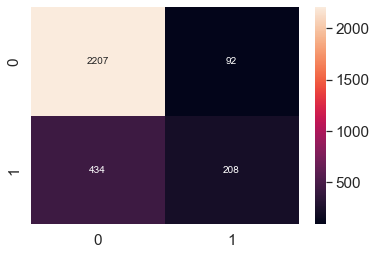

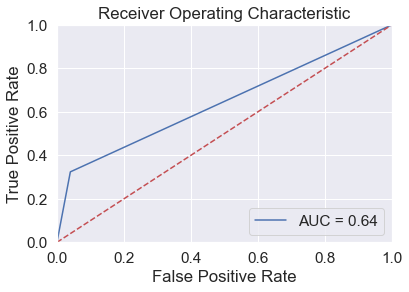

In [10]:
from sklearn.svm import SVC

clf = SVC(kernel='rbf', C=10, gamma=1, cache_size=1024)
clf.fit(xtrain, ytrain)

print("train score:", clf.score(xtrain, ytrain))
print("test score:", clf.score(xtest, ytest))

# Prevendo os resultados do conjunto de testes
y_pred = clf.predict(xtest)

print(metrics.classification_report(ytest, y_pred,  digits=5))
plot_confussion_matrix(ytest, y_pred)
plot_roc_curve(ytest, y_pred)